# Лабораторная 3. Сверточная нейронная сеть

Задача - написать сверточную нейронную сеть для классификации набора данных MNIST (http://yann.lecun.com/exdb/mnist/). Файлы в формате idx не очень удобны, поэтому скачаем датасет с сайта https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz. Яном ЛеКаном была достигнута ошибка без предобучения и предобработки на его LeNet-5 на уровне 0.95%. Попробуем повторить.

In [1]:
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from tqdm import tqdm
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_auc_score
from cnn import Pooling, Conv, relu, CNN
from MLP import MLP

Скачаем датасет и посмотрим на его размеры. У нас 60 тысяч примеров в обучающей выборке и 10 тысяч в тестовой. Размер изображения 28x28 пикселей.

In [2]:

def load_data(path):
    with np.load(path) as f:
        x_train, y_train = f['x_train'], f['y_train']
        x_test, y_test = f['x_test'], f['y_test']
        return (x_train, y_train), (x_test, y_test)

(x_train, y_train), (x_test, y_test) = load_data(r'C:\Users\Aleks\Documents\Neura\laba2\3. mnist.npz')

In [3]:
mas = np.zeros((y_train.shape[0], 10)) 
for i, value in enumerate(y_train):
    mas[i, value] = 1 

In [4]:
def normalize_min_max(X):
    return (X - np.mean(X)) / np.std(X)
x_train = normalize_min_max(x_train)

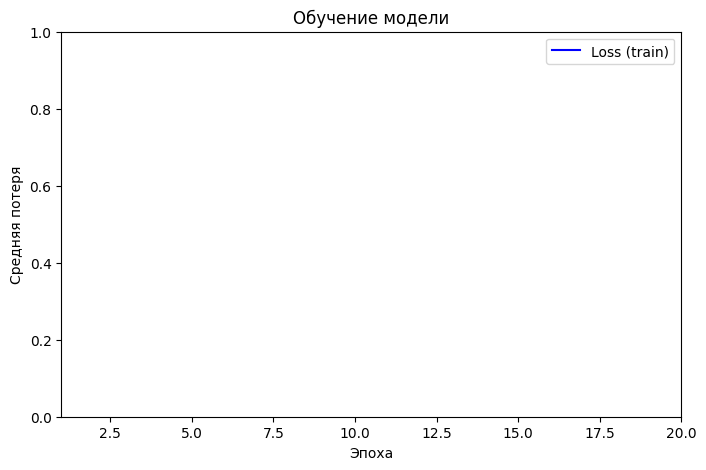

 12%|█▏        | 228/1875 [00:12<02:04, 13.19it/s, acc=2466, train_loss=1.59e+4]

In [ ]:
%matplotlib inline

c = CNN()
it = c.train(X = x_train ,y=mas, batch_size=32, epochs=20)

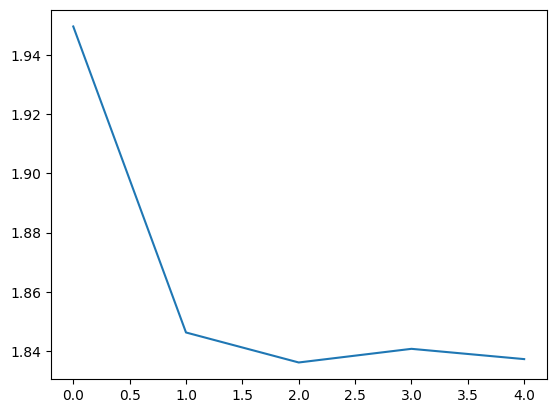

In [14]:
plt.plot(it)

In [6]:
x_test = normalize_min_max(x_test)
y = c.forward(x_test)

In [12]:
y = np.argmax(y, axis=1)

In [13]:
accuracy_score(y_test, y)

0.3174

In [42]:
axx(y_test,y)

c:\Users\Aleks\anaconda3\envs\business\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Aleks\anaconda3\envs\business\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Aleks\anaconda3\envs\business\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.10      1.00      0.18       980\n           1       0.00      0.00      0.00      1135\n           2       0.00      0.00      0.00      1032\n           3       0.00      0.00      0.00      1010\n           4       0.00      0.00      0.00       982\n           5       0.00      0.00      0.00       892\n           6       0.00      0.00      0.00       958\n           7       0.00      0.00      0.00      1028\n           8       0.00      0.00      0.00       974\n           9       0.00      0.00      0.00      1009\n\n    accuracy                           0.10     10000\n   macro avg       0.01      0.10      0.02     10000\nweighted avg       0.01      0.10      0.02     10000\n'

In [157]:
np.reshape(m,(2,6,26,26))

array([[[[2.10493113, 1.20852741, 1.83170166, ..., 3.5112126 ,
          3.11360839, 1.46431504],
         [2.63950513, 2.95822   , 2.16409995, ..., 1.30478744,
          2.05213725, 2.32145703],
         [1.57743724, 2.53211041, 1.59496227, ..., 2.44161117,
          1.51632697, 2.04963313],
         ...,
         [2.20555956, 3.77845905, 2.63089237, ..., 1.7451529 ,
          1.36702249, 1.87208577],
         [1.4841866 , 1.07902164, 1.57449587, ..., 3.26801936,
          2.04901641, 0.87514115],
         [1.83690488, 2.83545354, 1.96565893, ..., 1.27195861,
          2.62624471, 3.55478079]],

        [[2.57240985, 3.65428506, 2.83480096, ..., 3.49880693,
          2.63327489, 3.61838471],
         [2.79877451, 1.71459974, 2.94062026, ..., 3.98745598,
          3.10576796, 1.65898223],
         [2.79172071, 3.3179635 , 2.24324744, ..., 1.30581579,
          2.57948241, 2.93378685],
         ...,
         [3.28764242, 3.65875148, 2.53358368, ..., 0.84177943,
          2.32192743, 2.9

In [162]:
col2im(m,H_prime, W_prime)

array([[[[2.10493113, 1.20852741, 1.83170166, ..., 3.5112126 ,
          3.11360839, 1.46431504],
         [2.63950513, 2.95822   , 2.16409995, ..., 1.30478744,
          2.05213725, 2.32145703],
         [1.57743724, 2.53211041, 1.59496227, ..., 2.44161117,
          1.51632697, 2.04963313],
         ...,
         [2.20555956, 3.77845905, 2.63089237, ..., 1.7451529 ,
          1.36702249, 1.87208577],
         [1.4841866 , 1.07902164, 1.57449587, ..., 3.26801936,
          2.04901641, 0.87514115],
         [1.83690488, 2.83545354, 1.96565893, ..., 1.27195861,
          2.62624471, 3.55478079]],

        [[2.57240985, 3.65428506, 2.83480096, ..., 3.49880693,
          2.63327489, 3.61838471],
         [2.79877451, 1.71459974, 2.94062026, ..., 3.98745598,
          3.10576796, 1.65898223],
         [2.79172071, 3.3179635 , 2.24324744, ..., 1.30581579,
          2.57948241, 2.93378685],
         ...,
         [3.28764242, 3.65875148, 2.53358368, ..., 0.84177943,
          2.32192743, 2.9

In [27]:
np.dot(nw)

ValueError: shapes (9,6) and (16,9) not aligned: 6 (dim 1) != 16 (dim 0)

In [7]:
'''
def load_data(path):
    with np.load(path) as f:
        x_train, y_train = f['x_train'], f['y_train']
        x_test, y_test = f['x_test'], f['y_test']
        return (x_train, y_train), (x_test, y_test)

(x_train, y_train), (x_test, y_test) = load_data(r'C:\Users\Aleks\Documents\Neura\laba2\3. mnist.npz')

Conv2 = Conv(6, 3,3,1)
print(np.reshape(Conv2.w,(6,-1)))
ds = Conv2.conv_forward_naive(x_train, w = 0, conv_param={
    'pad':0,
    'stride':1
})
'''

In [8]:
p = ds.conv_forward()

ValueError: too many values to unpack (expected 2)

In [32]:
p[0].shape

(676, 9)

In [33]:
p[0][0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [34]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Посмотрим на распределения примеров по классам

In [35]:
k = np.random.rand(32,32)
s = np.zeros((3,3)) + 1

In [36]:
np.multiply(x_train[0][:3,:3] , s)

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [37]:
rng = np.random.default_rng(51)
net_in = 3
net_out = 3
limit = np.sqrt(6. / (net_in + net_out))
[rng.uniform(-limit, limit + 1e-5, size=(2, 3, 3)) for i in range(4)]

[array([[[ 0.88489182, -0.38572021, -0.49018418],
         [-0.55476072,  0.5724163 , -0.56658174],
         [ 0.61146106,  0.46532362, -0.15644632]],
 
        [[-0.01632798,  0.81849071,  0.58195217],
         [-0.69238389,  0.49799091, -0.19397872],
         [ 0.98282424, -0.57678243, -0.17904473]]]),
 array([[[ 0.88658458,  0.16041229,  0.4715087 ],
         [ 0.20950805, -0.53731725, -0.89091032],
         [-0.80990658, -0.2797338 , -0.81584642]],
 
        [[-0.66017449, -0.02821252, -0.28963312],
         [ 0.12429169, -0.31340288,  0.11212069],
         [ 0.28593657,  0.70866562, -0.93296742]]]),
 array([[[ 0.50153706, -0.25261777, -0.5015572 ],
         [-0.77694375,  0.07755013,  0.41221102],
         [ 0.99942024, -0.37894662,  0.96474358]],
 
        [[ 0.05392429,  0.7898254 , -0.81901067],
         [-0.8869455 , -0.12196893, -0.95505907],
         [-0.38575177, -0.93992606,  0.63716411]]]),
 array([[[-0.83822372,  0.10662458,  0.9370522 ],
         [-0.05892032, -0.379443

In [38]:

k.shape

(1, 2, 3)

In [39]:
k

array([[[0.87237041, 0.55732647, 0.13452029],
        [0.91737096, 0.12997154, 0.64804341]]])

In [40]:
k.shape

(1, 2, 3)

In [41]:
x_train[1].shape

(28, 28)

In [12]:
import numpy as np
k = np.random.random((5,10))
k

array([[0.7642776 , 0.20119618, 0.34742863, 0.39984008, 0.55065246,
        0.82674629, 0.19837297, 0.61582943, 0.73046257, 0.85514364],
       [0.81027064, 0.70247914, 0.90346987, 0.70071593, 0.15177885,
        0.97353911, 0.54469227, 0.08211146, 0.66557357, 0.80398486],
       [0.40516223, 0.47363911, 0.06405298, 0.0144328 , 0.37868489,
        0.00307817, 0.15484879, 0.3743045 , 0.22411018, 0.03500816],
       [0.9923958 , 0.11602865, 0.75472596, 0.65288566, 0.66202852,
        0.2448614 , 0.28435636, 0.03271574, 0.72883247, 0.50721157],
       [0.46936117, 0.98734872, 0.89726454, 0.44712464, 0.2712124 ,
        0.91195734, 0.28767964, 0.4970029 , 0.19959888, 0.80482208]])

In [6]:
from cnn import Conv
Conv2 = Conv(amount_filters=6,height=3,width=3)



In [7]:
x_train.shape

(60000, 28, 28)

In [7]:
Conv2.conv_forward_naive(x_train,0,{'pad': 0, "stride":1} )

AttributeError: 'list' object has no attribute 'shape'

In [10]:
np.zeros((6, 1))

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [21]:
itog2.shape

(625, 16)

In [5]:
itog2

array([[0.81545879, 0.57469092, 0.75181564, ..., 0.70810583, 0.50080641,
        0.18762473],
       [0.57469092, 0.75181564, 0.59444057, ..., 0.50080641, 0.18762473,
        0.86421572],
       [0.75181564, 0.59444057, 0.7265268 , ..., 0.18762473, 0.86421572,
        0.31166554],
       ...,
       [0.51188106, 0.09269327, 0.36289578, ..., 0.90949011, 0.22750648,
        0.14775397],
       [0.09269327, 0.36289578, 0.04629901, ..., 0.22750648, 0.14775397,
        0.86631001],
       [0.36289578, 0.04629901, 0.43937511, ..., 0.14775397, 0.86631001,
        0.17571684]])

In [ ]:
for i in range(x_train.shape[0]):
    for j in range(x_train.shape[1])
    x_train[0][]


In [14]:
import numpy as np
k = np.random.random([1, 5, 5, 8])
len(k)

1

In [25]:
(28-3) // 1 +1

26

In [15]:
for i in k:
    print(i)

[[[1.16857971e-01 1.24179528e-02 2.21559051e-01 8.26631744e-01
   7.21197804e-01 1.35586075e-01 2.85110021e-01 4.32564185e-01]
  [2.13951776e-01 8.45501867e-02 6.82347251e-02 3.82983697e-01
   9.76475336e-02 1.31340367e-01 4.75456042e-01 6.50049564e-01]
  [2.38475026e-01 7.40149314e-01 4.87293886e-01 1.88536180e-01
   4.69809733e-01 3.83037147e-01 7.20547064e-01 8.86040602e-01]
  [9.43484663e-01 5.76032224e-01 8.20428157e-01 8.36473410e-01
   8.94290365e-01 8.41719313e-01 2.92625317e-01 6.93669688e-01]
  [7.21090873e-01 7.38840613e-01 5.19971903e-01 3.98638865e-01
   4.61002681e-01 2.72261096e-01 5.79533790e-01 9.69438674e-01]]

 [[2.86569297e-01 1.23234417e-01 4.78051033e-01 2.72811330e-01
   9.27834691e-01 7.71348526e-01 3.75936803e-01 9.49822378e-01]
  [3.88346441e-01 7.32629446e-01 1.81538118e-01 2.77300559e-01
   9.61777613e-01 4.14346834e-01 7.56509823e-01 6.76320989e-01]
  [1.14010758e-01 5.44186188e-02 7.26138079e-01 3.85128764e-01
   2.46115171e-01 1.58626341e-01 5.35599068e-0

In [25]:
np.convolve(s,k)

ValueError: object too deep for desired array

In [24]:
img1

array([[200, 200],
       [200, 200]])

[[ 2  2]
 [-2 -2]] is a kernel for detecting horizontal edges
[[ 2 -2]
 [ 2 -2]] is a kernel for detecting vertical edges


In [6]:
unique, counts = np.unique(y_train, return_counts=True)
df = pd.DataFrame(counts, columns=["Counts"])
df

Counts
0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949

# t-SNE

Визуализируем пространство нашей обучающей выборки с помощью алгоритма t-SNE, чтобы оценить разделимость классов

In [6]:
X_train = x_train.reshape(x_train.shape[0], 784)

In [7]:
embed=TSNE(n_components=2,perplexity=10,learning_rate=200,n_iter=1000)

In [8]:
X_embedded = embed.fit_transform(X_train)

C:\Users\Sander\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [9]:
print('Расхождение Кульбака-Лейблера после оптимизации: ', embed.kl_divergence_)

Расхождение Кульбака-Лейблера после оптимизации:  3.4899332523345947


In [10]:
fig = px.scatter(None, x=X_embedded[:,0], y=X_embedded[:,1],
labels={"x": "Dimension 1","y": "Dimension 2",},
opacity=1, color=y_train.astype(str))
fig.update_layout(dict(plot_bgcolor = 'white'))
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey',
zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey',
showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey',
zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey',
showline=True, linewidth=1, linecolor='black')

fig.update_layout(title_text="t-SNE")
fig.update_traces(marker=dict(size=3))

fig.show()

In [12]:
fig.write_html("tsne.html")

# Le-Net 5

In [ ]:
def relu(x):
    return (x >= 0) * x

def relu2deriv(output):
    return output >= 0

In [ ]:
seed = 884736743
rng = np.random.default_rng(seed)

In [ ]:
learning_rate = 0.0001
epochs = 30
hidden_size = 100
pixels_per_image = 784
num_labels = 10

In [ ]:
self.W0_gen = np.random.randn(self.noise, self.h_gen_size) * np.sqrt(2. / self.noise) 
self.b0_gen = np.zeros((1, self.h_gen_size))

self.W1_gen = np.random.randn(self.h_gen_size, self.image_size ** 2) * np.sqrt(2. / self.noise)
self.b1_gen = np.zeros((1, self.image_size ** 2))

In [ ]:
plt.subplot(3, 1, 1)
plt.plot(train_losses, label="training loss")
plt.plot(test_losses, label="test loss")
plt.title("Losses")
plt.legend()

In [ ]:
print(classification_report(y_true, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))